<h1>Group Name: The Happiness Duo</h1>
<ul>
    <li>
        Student # 1:</br>
        <ul>
            <li>
            <b>Full Name:</b> LAURENT Sacha
            </li>
            <li>
            <b>Student ID:</b> 20220702
            </li>
        </ul>
    </li>
    <li>
        Student # 2:</br>
        <ul>
            <li>
            <b>Full Name:</b> SIMON Eliot
            </li>
            <li>
            <b>Student ID:</b> 20220758
            </li>
        </ul>
    </li>
</ul>

</br><hr>

<h1>Step 1: Dataset Selection</h1>
<b>World Happiness Report</b> <br/>
Happiness scored according to economic production, social support, etc. <br/>
<a href="https://www.kaggle.com/datasets/unsdsn/world-happiness"> Dataset link on Kaggle </a>

</br><hr>

<h1>Step 2: Scenario/About Dataset:</h1>
This dataset contains global data on happiness scores and factors that contribute to happiness, such as GDP per capita (Economy), family, social support,  life expectancy...

<b>Problem Statement:</b><br/>
<ul>
    <li>We want to understand global happiness trends to design effective policy recommendations and allocate resources for improving well-being across different regions. With the World Happiness dataset, which includes metrics such as GDP per capita, social support, life expectancy, freedom, corruption... Machine Learning will allow us to identify key trends and actionable insights</li>
</ul>

<b>How Machine Learning is Useful on this dataset:</b>
<ul>
    <li><b>Regression:</b> To predict happiness scores based on measurable socio-economic indicators, providing a model able to predict happiness scores and simulate the impact of policy changes.</li>
    <li><b>Clustering:</b> To group countries into similar categories based on happiness profiles or socioeconomic factors, revealing hidden patterns regional similarities and global trends</li>
    <li><b>Classification:</b> To categorize countries into predefined happiness levels (e.g., "High Happiness," "Medium Happiness," "Low Happiness") for prioritizing regions needing immediate attention</li>
</ul>

</br><hr>

<h1>Step 3: Data Loading:</h1>

In [596]:
import pandas as pd

#%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

<h1>Read csv</h1>

In [597]:
D = pd.read_csv("World_Happiness.csv", header=0)
D.head(8)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,NaN,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553


<hr>

<h1>Step 4: Data Wrangling or Data Pre-processing</h1>

In [598]:
import numpy as np
from sklearn import preprocessing

Handle missing values

In [599]:
# count the number of missing values in each column
print("Missing values for each column:")
for col in D.columns:
    print("-", col+":", D[col].isnull().sum())

Missing values for each column:
- Country: 0
- Region: 0
- Happiness Rank: 0
- Happiness Score: 0
- Lower Confidence Interval: 4
- Upper Confidence Interval: 3
- Economy (GDP per Capita): 0
- Family: 0
- Health (Life Expectancy): 0
- Freedom: 1
- Trust (Government Corruption): 2
- Generosity: 0
- Dystopia Residual: 1


We can see that many values are missing, we will handle them by filling them with the mean of the column

In [600]:
D["Lower Confidence Interval"] = D["Lower Confidence Interval"].replace(np.nan, D["Lower Confidence Interval"].astype("float64").mean(axis=0))
D["Upper Confidence Interval"] = D["Upper Confidence Interval"].replace(np.nan, D["Upper Confidence Interval"].astype("float64").mean(axis=0))
D["Freedom"] = D["Freedom"].replace(np.nan, D["Freedom"].astype("float64").mean(axis=0))
D["Trust (Government Corruption)"] = D["Trust (Government Corruption)"].replace(np.nan, D["Trust (Government Corruption)"].astype("float64").mean(axis=0))
D["Dystopia Residual"] = D["Dystopia Residual"].replace(np.nan, D["Dystopia Residual"].astype("float64").mean(axis=0))

No more values are missing</br>
We can Standardize the data after Dropping the useless columns

In [601]:
X = D.values[:, 3:]   # Drops the first three columns (Country, Region, Happiness Rank)
X_standardized = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_standardized

array([[ 1.88379206,  1.92841939,  1.90171148, ...,  2.77528388,
         0.89309199,  0.77604179],
       [ 1.86885399,  1.89995418,  1.89990572, ...,  2.48020506,
         0.28647245,  0.692866  ],
       [ 1.86182431,  1.81544807,  1.97123345, ...,  0.09887352,
         1.7561448 ,  0.94696471],
       ...,
       [-1.82700053, -1.86812848, -1.87053271, ..., -0.20873481,
        -0.50600309, -0.34632972],
       [-2.03261868, -2.09585019,  0.        , ...,  0.30388521,
         1.81007154, -2.79460816],
       [-2.17672713, -2.27731593, -2.17390132, ..., -0.40557509,
        -0.29802139, -0.40460481]])

<hr>

<h1>Step 5: Exploratory Data Analysis:</h1>

Text(0.5, 1.0, 'Happiness Score Histogram (10 bins)')

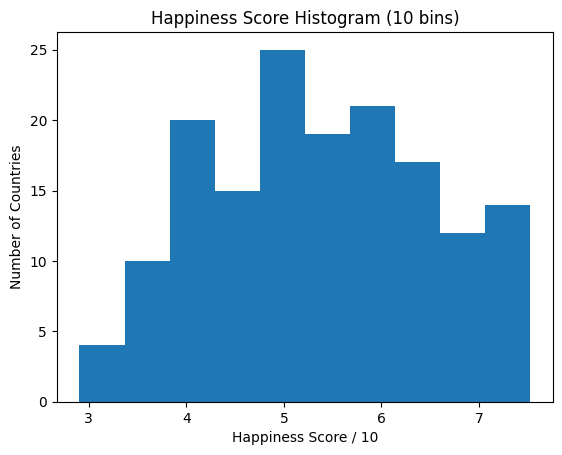

In [602]:
# Happiness Score histogram
plt.pyplot.hist(D['Happiness Score'], bins=10)
plt.pyplot.xlabel('Happiness Score / 10')
plt.pyplot.ylabel('Number of Countries')
plt.pyplot.title('Happiness Score Histogram (10 bins)')

This histogram reveals the average World happiness. We can see many countries manage to have a Happiness score above 7/10 although the most frequent values are between 4 and 5 /10

Text(0.5, 1.0, 'Happiness Score vs Economy (GDP per Capita)')

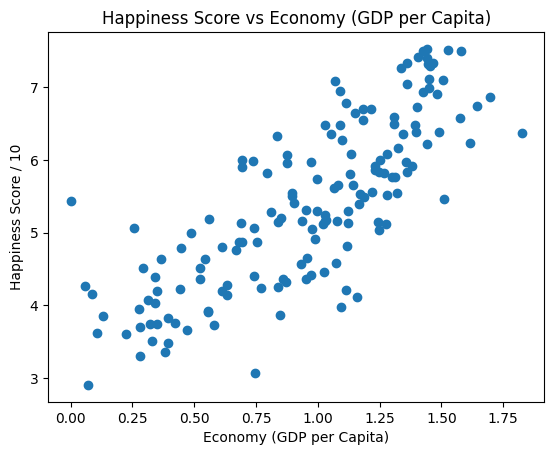

In [603]:
plt.pyplot.scatter(D["Economy (GDP per Capita)"], D["Happiness Score"])
plt.pyplot.ylabel('Happiness Score / 10')
plt.pyplot.xlabel("Economy (GDP per Capita)")
plt.pyplot.title("Happiness Score vs Economy (GDP per Capita)")

This graph seems to show that the more money a country produces, the happier its inhabitants will be.

Text(0.5, 1.0, 'Happiness Score vs Health (Life Expectancy)')

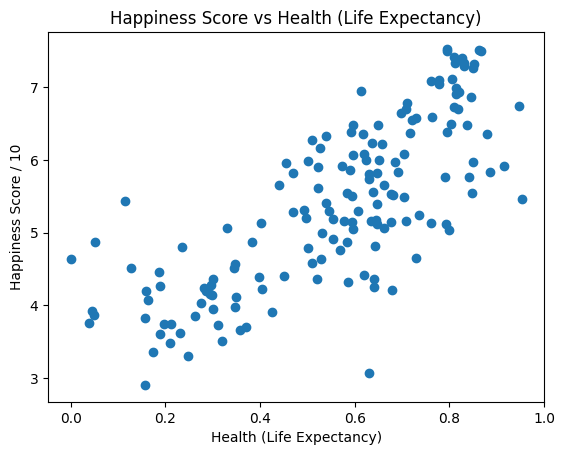

In [604]:
plt.pyplot.scatter(D["Health (Life Expectancy)"], D["Happiness Score"])
plt.pyplot.ylabel('Happiness Score / 10')
plt.pyplot.xlabel("Health (Life Expectancy)")
plt.pyplot.title("Happiness Score vs Health (Life Expectancy)")

This graph seems to further confirm that many variables are linearly linked with the Happiness Score as the better the health a country has, the happier its inhabitants will be.

Text(0.5, 1.0, 'Happiness Score vs Generosity')

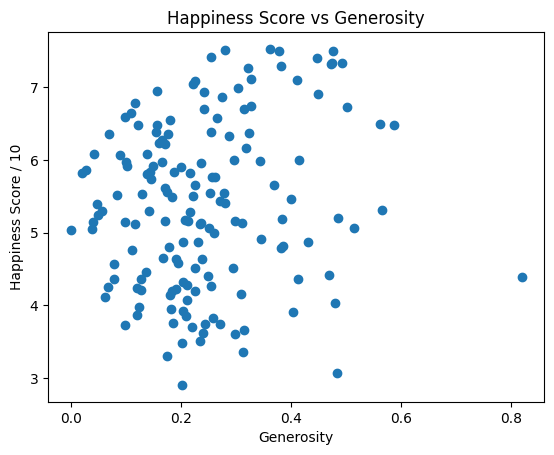

In [605]:
plt.pyplot.scatter(D["Generosity"], D["Happiness Score"])
plt.pyplot.ylabel('Happiness Score / 10')
plt.pyplot.xlabel("Generosity")
plt.pyplot.title("Happiness Score vs Generosity")

However, it is important to note that not all features behave that way. Happiness does not seem to depend on the Generosity for example which was against our first intuition.

Text(0.5, 1.0, 'Happiness Score in function of Economy (GDP per Capita)')

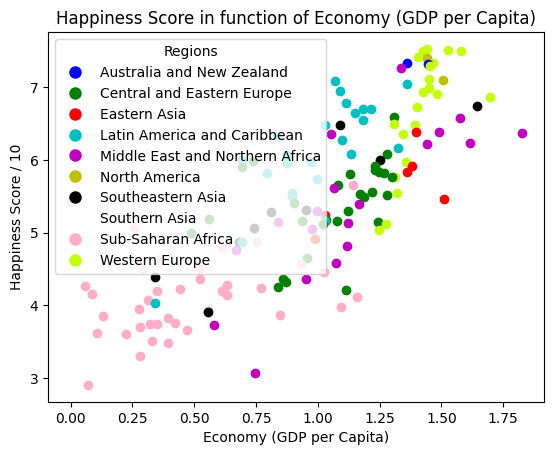

In [606]:
independant_var = "Economy (GDP per Capita)"
y = range(0,9)
for i, region in enumerate(D["Region"]):
    if   region == "Australia and New Zealand": plt.pyplot.scatter(D[independant_var][i],D["Happiness Score"][i],  color='b')
    elif region == "Central and Eastern Europe": plt.pyplot.scatter(D[independant_var][i],D["Happiness Score"][i],  color='g')
    elif region == "Eastern Asia": plt.pyplot.scatter(D[independant_var][i],D["Happiness Score"][i],  color='r')
    elif region == "Latin America and Caribbean": plt.pyplot.scatter(D[independant_var][i],D["Happiness Score"][i],  color='c')
    elif region == "Middle East and Northern Africa": plt.pyplot.scatter(D[independant_var][i],D["Happiness Score"][i],  color='m')
    elif region == "North America": plt.pyplot.scatter(D[independant_var][i],D["Happiness Score"][i],  color='y')
    elif region == "Southeastern Asia": plt.pyplot.scatter(D[independant_var][i],D["Happiness Score"][i],  color='k')
    elif region == "Southern Asia": plt.pyplot.scatter(D[independant_var][i],D["Happiness Score"][i],  color='w')
    elif region == "Sub-Saharan Africa": plt.pyplot.scatter(D[independant_var][i], D["Happiness Score"][i], color='#ffaec8')
    elif region == "Western Europe": plt.pyplot.scatter(D[independant_var][i], D["Happiness Score"][i], color='#c4ff0e')

# Create a custom legend for the plot
colors = {
    "Australia and New Zealand": 'b',
    "Central and Eastern Europe": 'g',
    "Eastern Asia": 'r',
    "Latin America and Caribbean": 'c',
    "Middle East and Northern Africa": 'm',
    "North America": 'y',
    "Southeastern Asia": 'k',
    "Southern Asia": 'w',
    "Sub-Saharan Africa": '#ffaec8',
    "Western Europe": '#c4ff0e'
}
handles = [plt.pyplot.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=region) for region, color in colors.items()]
plt.pyplot.legend(handles=handles, title="Regions")

plt.pyplot.ylabel("Happiness Score / 10")
plt.pyplot.xlabel(independant_var)
plt.pyplot.title("Happiness Score in function of " + independant_var)
# axis from 0 to 10
#plt.pyplot.axis([0, 10, 0, 2])

The above graph shows the economy and the happiness of the countries colored by which region they are in. We can see that <b>the countries in the same region tend to have similar happiness and economy scores</b> which is a very important insight for our future analysis.

<hr>

<h1>Step 6: Model Development:</h1>

<h2>KNN Classification</h2>

In [607]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

For this model, We will use the standardized data stored in X_standardized</br>
First, we save the column we want to classify the countries on in Y

In [608]:
# save the data in a numpy array
Y = D["Happiness Score"].values.astype(int)
Y

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2])

This array represents the happiness of the countries out of 10.<br/>
Each value / 10 will be a category for the KNN model<br/><br/>
Split the data into training and testing sets

In [609]:
X_train_KNN, X_test_KNN, Y_train_KNN, Y_test_KNN = train_test_split(X_standardized, Y, test_size=0.2, random_state=4)
# test_size: the proportion of the dataset to include in the test split
# random_state: the seed used by the random number generator, the larger the number, the less random the dataset will be

Fit the model and classify the test data

In [610]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_KNN, Y_train_KNN)
Y_hat_KNN = neigh.predict(X_test_KNN)
Y_hat_KNN

array([6, 4, 6, 4, 6, 3, 6, 7, 6, 6, 4, 6, 4, 6, 6, 5, 6, 3, 5, 7, 4, 6,
       6, 3, 3, 5, 7, 5, 7, 6, 4, 5])

We can see that the model is indeed classifying the countries of the test set into categories (happiness score/10)<br/>
We will test the accuracy of the model in the Model Evaluation step and interpret the results in the Model Refinement step

<h2>Linear Regression</h2>

importing the necessary libraries

In [611]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

selecting features

In [612]:
# selecting features
independant_var = "Economy (GDP per Capita)"
dependant_var = "Happiness Score"

X = D[independant_var].values
Y = D[dependant_var].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# random_state is the seed used by the random number generator
# the bigger it is, the more random the split will be

fit the model

In [613]:
# convert into a 2d array first so that we can use it in the model
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

obtain the coefficients

In [614]:
c = lr.intercept_
m = lr.coef_

Y_pred_train_manual = m * X_train + c

plot the data

Text(0.5, 1.0, 'Happiness Score in function of Economy (GDP per Capita)')

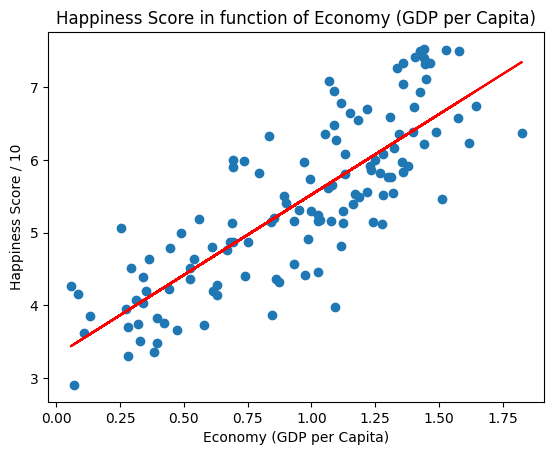

In [615]:
plt.pyplot.scatter(X_train, Y_train)
plt.pyplot.plot(X_train, Y_pred_train_manual,'r')   # fitted line

plt.pyplot.xlabel(independant_var)
plt.pyplot.ylabel(dependant_var + " / 10")
plt.pyplot.title(dependant_var + " in function of " + independant_var)

We can see that the happiness Score and Economy (GDP per Capita) are very linearly dependant.<br/>
The more money the inhabitants of a country have, the happier they are.

<h2>Clustering</h2>

Text(0.5, 1.0, 'Generosity in function of Economy (GDP per Capita)')

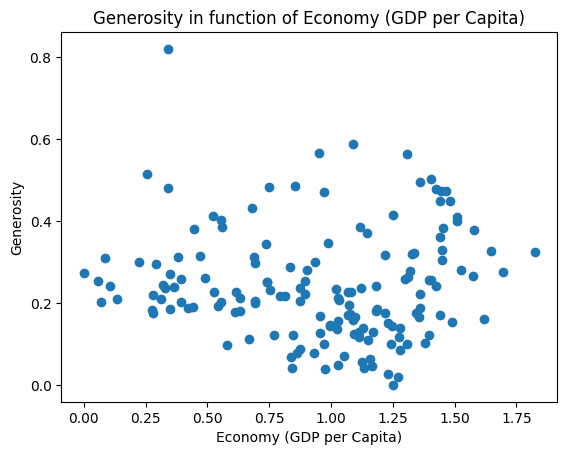

In [616]:
independant_var = "Economy (GDP per Capita)"
dependant_var = "Generosity"

plt.pyplot.scatter(D[independant_var], D[dependant_var])
plt.pyplot.xlabel(independant_var)
plt.pyplot.ylabel(dependant_var)
plt.pyplot.title(dependant_var + " in function of " + independant_var)

Here are the two variables we will use for clustering: <b>Economy (GDP per Capita)</b> and <b>Generosity</b><br/>
These two variables are interesting for clustering as they are not linearly dependant

<h3>K-Means Clustering</h3>

In [617]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [618]:
X_KMEANS = D.values[:,3:]   # we drop the first 3 columns (Country, Region, Happiness Rank)
X_KMEANS = np.nan_to_num(X_KMEANS)
Clus_dataSet = StandardScaler().fit_transform(X_KMEANS)

In [619]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
# "kmeans++" selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
# n_init is the number of times the k-means algorithm will be run with different centroid seeds.
# The final results will be the best output of n_init consecutive runs in terms of inertia.
k_means.fit(X_KMEANS)   
labels = k_means.labels_

In [620]:
independant_var = "Economy (GDP per Capita)"
dependant_var = "Generosity"

Text(0.5, 1.0, 'K-means, k=3, for Generosity & Economy (GDP per Capita)')

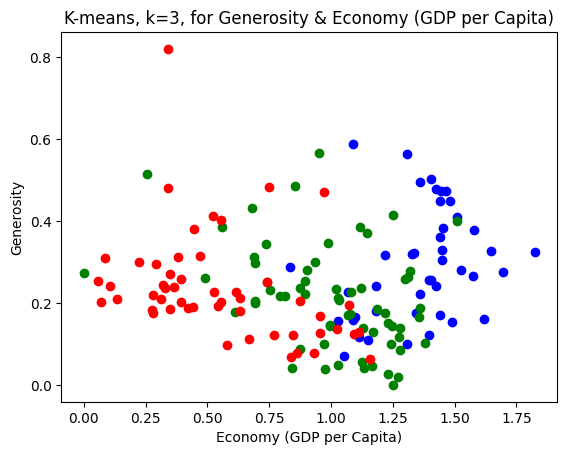

In [621]:
num = labels[0]
color = ['blue', 'green', 'red']
color_index = 0
for i, label in enumerate(labels):
    if num != label:
        color_index += 1 
    num = labels[i]
    if   label == 0: plt.pyplot.plot(D[independant_var][i], D[dependant_var][i], color=color[color_index], marker='o')
    elif label == 1: plt.pyplot.plot(D[independant_var][i], D[dependant_var][i], color=color[color_index], marker='o')
    elif label == 2: plt.pyplot.plot(D[independant_var][i], D[dependant_var][i], color=color[color_index], marker='o')
#plt.pyplot.scatter(D[independant_var], D[dependant_var], c=labels.astype(float))

plt.pyplot.xlabel(independant_var)
plt.pyplot.ylabel(dependant_var)
plt.pyplot.title("K-means, k=3, for " + dependant_var + " & " + independant_var)

What do these clusters represent?<br/><br/>
Let's plot the graph with different colors for each region and guess the meaning of each cluster

Text(0.5, 1.0, 'Generosity in function of Economy (GDP per Capita)')

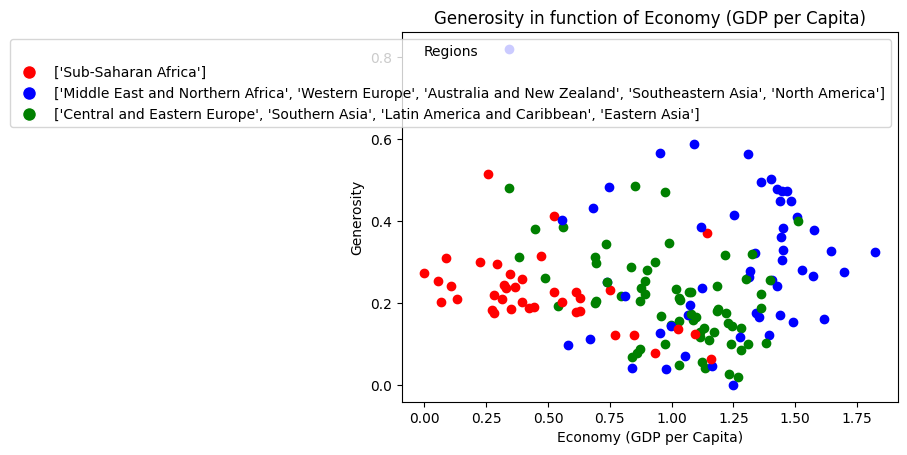

In [622]:
category1 = ["Sub-Saharan Africa"]
category2 = ["Middle East and Northern Africa", "Western Europe", "Australia and New Zealand", "Southeastern Asia", "North America"]
category3 = ["Central and Eastern Europe", "Southern Asia", "Latin America and Caribbean", "Eastern Asia"]

for i, region in enumerate(D["Region"]):
    if   region in category1: plt.pyplot.scatter(D[independant_var][i], D[dependant_var][i], color='red')
    elif region in category2: plt.pyplot.scatter(D[independant_var][i], D[dependant_var][i], color='blue')
    elif region in category3: plt.pyplot.scatter(D[independant_var][i], D[dependant_var][i], color='green')

colors = {
    str(category1): 'red',
    str(category2): 'blue',
    str(category3): 'green'
}
handles = [plt.pyplot.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=region) for region, color in colors.items()]
plt.pyplot.legend(handles=handles, title="Regions")

plt.pyplot.ylabel(dependant_var)
plt.pyplot.xlabel(independant_var)
plt.pyplot.title(dependant_var + " in function of " + independant_var)

With this graph, we can explain better the clusters generated by the K-Means algorithm:

<b>Category 1 (red):</b> "Emerging Regions"
<ul>
    <li>Includes: Sub-Saharan Africa</li>
    <li>Rationale: Sub-Saharan Africa is often characterized by developing economies and unique socio-political challenges, making it distinct from the other regions.</li>
</ul>
<b>Category 2 (blue):</b> "Developed and Diverse Economies"
<ul>
    <li>Includes: Middle East and Northern Africa, Western Europe, Australia and New Zealand, Southeastern Asia, North America</li>
    <li>Rationale: These regions represent a mix of developed economies and regions with significant economic diversity. They encompass high-income countries (e.g., Western Europe, North America, Australia and New Zealand) and rapidly developing areas with economic integration (e.g., Southeastern Asia, parts of the Middle East).</li>
</ul>

<b>Category 3 (green):</b> "Transitional and Emerging Economies"
<ul>
    <li>Includes: Central and Eastern Europe, Southern Asia, Latin America and Caribbean, Eastern Asia</li>
    <li>Rationale: These regions are characterized by a mix of developing and transitional economies, with many countries undergoing rapid industrialization and socio-economic changes.</li>
</ul>

<h3>Comparison with HCA</h3>

In [623]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [624]:
independant_var = "Economy (GDP per Capita)"
dependant_var = "Generosity"

# Convert the dataframe into a 2D numpy array
X = D[[independant_var, dependant_var]].values

Text(0, 0.5, 'Generosity')

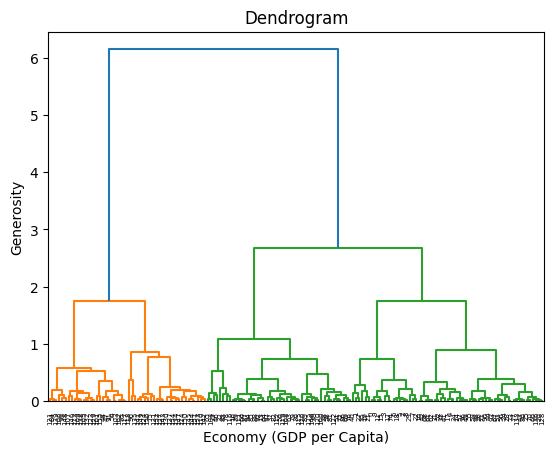

In [625]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.pyplot.title('Dendrogram')
plt.pyplot.xlabel(independant_var)
plt.pyplot.ylabel(dependant_var)

We can see that the number of clusters is 3

In [626]:
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
#print(y_hc)

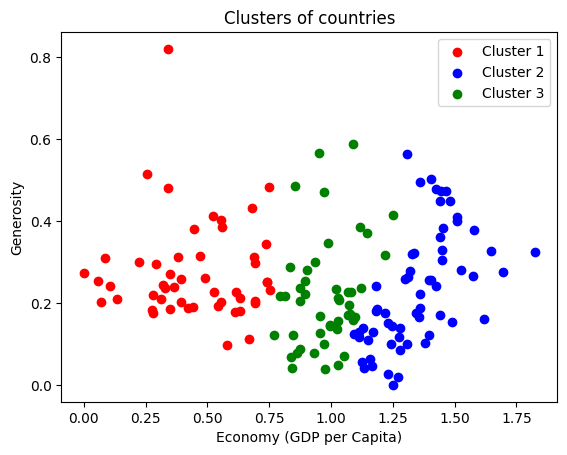

In [627]:
plt.pyplot.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], c = 'red', label = 'Cluster 1')
plt.pyplot.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], c = 'blue', label = 'Cluster 2')
plt.pyplot.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], c = 'green', label = 'Cluster 3')
#plt.pyplot.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], c = 'cyan', label = 'Cluster 4')
#plt.pyplot.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], c = 'magenta', label = 'Cluster 5')

plt.pyplot.title('Clusters of countries')
plt.pyplot.xlabel(independant_var)
plt.pyplot.ylabel(dependant_var)
plt.pyplot.legend()
plt.pyplot.show()

The model is not sensitive enough to sound to accurately cluster the countries/regions.<br/>
The clusters are clear but meaningless regarding our data.

</b><hr>

<h1>Step 7: Model Evaluation:</h1>

<h2>KNN Evaluation</h2>

In [628]:
from sklearn import metrics

In [629]:
print("Train set Accuracy: ", metrics.accuracy_score(Y_train_KNN, neigh.predict(X_train_KNN)))
print("Test set Accuracy: " , metrics.accuracy_score(Y_test_KNN,  Y_hat_KNN))

Train set Accuracy:  0.88
Test set Accuracy:  0.78125


We can see that the accuracy of our KNN classifier for both the Train & Test set is pretty high.<br/>
Let's see if it could be higher with a different number of neighbors

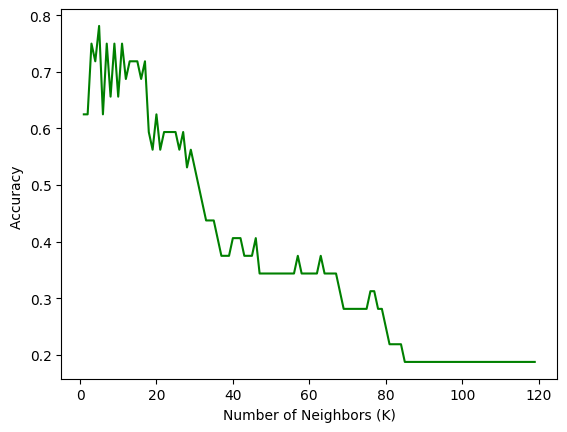

In [ ]:
Ks = 100
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_KNN,Y_train_KNN)
    Y_hat_KNN = neigh.predict(X_test_KNN)
    mean_acc[n-1] = metrics.accuracy_score(Y_test_KNN, Y_hat_KNN)

plt.pyplot.plot(range(1,Ks),mean_acc,'g')
plt.pyplot.ylabel('Accuracy ')
plt.pyplot.xlabel('Number of Neighbors (K)')
plt.pyplot.show()

This graph shows us the accuracy of the model for different numbers of neighbors.

In [ ]:
print( "The best Test set accuracy was", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best model accuracy was 0.78125 with k = 5


We can conclude that the best number of neighbors is 5 as it gives the highest accuracy for the test set while keeping a high accuracy for the training set.

<h2>K-MEANS Evaluation</h2>

In [632]:
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Text(0.5, 1.0, 'Elbow Method For Optimal k')

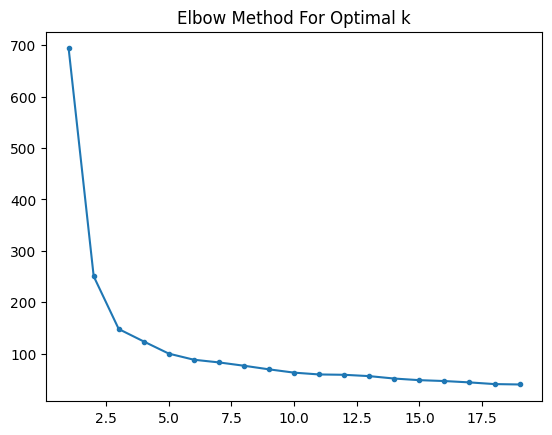

In [633]:
K=range(1,20)
WCSS=[]
for i in K:
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X_KMEANS)
  WCSS.append(kmeans.inertia_)
  WCSS
  
plt.pyplot.plot(K,WCSS,'.-')
plt.pyplot.title('Elbow Method For Optimal k')

We see a sudden drop in inertia at k=3, then the curve becomes linear.<br/>
Therefore, we can assume that the optimal number of clusters is 3 as we have previously chosen.

Text(0.5, 1.0, 'Silhouette score For each k')

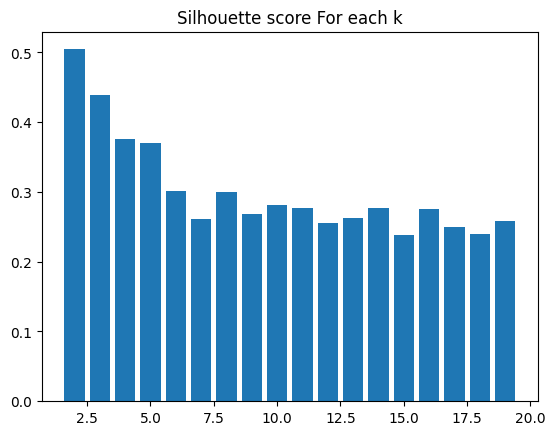

In [634]:
silh=[]

for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    silhouette_avg=silhouette_score(X_KMEANS, kmeans.fit_predict(X_KMEANS))
    silh.append(silhouette_avg)

plt.pyplot.bar(range(2,20),silh)
plt.pyplot.title('Silhouette score For each k')

In [635]:
print("The silhouette score for k=3 is",silh[1])

The silhouette score for k=3 is 0.4382376345403597


The silhouette score for k=3 is 0.45, which is not very high, but is acceptable.

</b><hr>

<h1>Step 8: Model Refinement:</h1>

HCA: The model was not sensitive enough to noise to accurately cluster the countries/regions.<br/>
Unlike K-Means, HCA is not very sensitive to noise.<br/>
K-Means is more sensitive to noise which made it more accurate in this case.